In [80]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
vehicle = pd.read_csv("dataset_54_vehicle.csv")

In [82]:
vehicle.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [83]:
vehicle.dtypes

COMPACTNESS                   int64
CIRCULARITY                   int64
DISTANCE_CIRCULARITY          int64
RADIUS_RATIO                  int64
PR.AXIS_ASPECT_RATIO          int64
MAX.LENGTH_ASPECT_RATIO       int64
SCATTER_RATIO                 int64
ELONGATEDNESS                 int64
PR.AXIS_RECTANGULARITY        int64
MAX.LENGTH_RECTANGULARITY     int64
SCALED_VARIANCE_MAJOR         int64
SCALED_VARIANCE_MINOR         int64
SCALED_RADIUS_OF_GYRATION     int64
SKEWNESS_ABOUT_MAJOR          int64
SKEWNESS_ABOUT_MINOR          int64
KURTOSIS_ABOUT_MAJOR          int64
KURTOSIS_ABOUT_MINOR          int64
HOLLOWS_RATIO                 int64
Class                        object
dtype: object

In [84]:
vehicle["Class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [85]:
vehicle.loc[vehicle["Class"] == 'van', "Class"] = 0
vehicle.loc[vehicle["Class"] == 'saab', "Class"] = 1
vehicle.loc[vehicle["Class"] == 'bus', "Class"] = 2
vehicle.loc[vehicle["Class"] == 'opel', "Class"] = 3

In [86]:
vehicle.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,0
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,0
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,0
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,2


In [87]:
for column in vehicle.columns[:-1]:
    col_min = vehicle[column].min()
    col_max = vehicle[column].max()
    vehicle[column] = (vehicle[column] - col_min) / (col_max - col_min)

In [88]:
vehicle.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,0
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,0
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,1
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,0
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,2


In [89]:
vehicle.shape

(846, 19)

In [90]:
vehicle = vehicle[:100]

In [91]:
X = np.array(vehicle.drop("Class", axis=1))
y = np.array(vehicle["Class"])

In [92]:
max_dists = []

In [93]:
class KNN:
    """
    K-neariest-neighbor classifier
    """
    def __init__(self, k=1, dist_type='manhattan', kernel='triweight', window='variable', h=1):
        self.k = k
        self.dist_type = dist_type
        self.kernel = kernel
        self.h = h
        self.window = window

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        dists = self.compute_distances(X_test, self.dist_type)
        dists = sorted([[dists[i], self.y_train[i]] for i in range(len(dists))])
        max_dists.append(dists[-1][0])
        n = len(dists)
        w = []
        for i in range(n):
            if self.window == 'fixed':
                w.append([self.K(dists[i][0] / h, self.kernel), dists[i][1]])
            if self.window == 'variable':
                w.append([self.K(dists[i][0] / dists[self.k][0], self.kernel), dists[i][1]])
        if self.window == 'fixed':
            self.k = n
        return self.predict_labels(w)
        
    def compute_distances(self, X_test, dist_type):
        n = self.X_train.shape[0]
        m = self.X_train.shape[1]
        dists = [0] * n
        for i in range(n):
            for j in range(m):
                if dist_type == 'manhattan':
                    dists[i] += abs(X_test[j] - self.X_train[i][j])
                if dist_type == 'euclidean':
                    dists[i] += (X_test[j] - self.X_train[i][j]) ** 2
                if dist_type == 'chebyshev':
                    dists[i] = max(dists[i], abs(X_test[j] - self.X_train[i][j]))
            if dist_type == 'euclidean':
                dists[i] = dists[i] ** 0.5
        return dists

    def K(self, u, kernel):
        if kernel == 'logistic':
            return 1 / (math.e ** u + 2 + math.e ** -u)
        if kernel == 'sigmoid':
            return 2 / math.pi * 1 / (math.e ** u + math.e ** -u)
        if kernel == 'gaussian':
            return math.e ** (-0.5 * u ** 2) / (2 * math.pi) ** (0.5)

        if u >= 1:
            return 0
        if kernel == 'uniform':
            return 0.5
        if kernel == 'triangular':
            return 1 - u
        if kernel == 'epanechnikov':
            return 3 / 4 * (1 - u ** 2)
        if kernel == 'quartic':
            return 15 / 16 * (1 - u ** 2) ** 2
        if kernel == 'triweight':
            return 35 / 32 * (1 - u ** 2) ** 3
        if kernel == 'tricube':
            return 70 / 81 * (1 - u ** 3) ** 3
        if kernel == 'cosine':
            return math.pi / 4 * math.cos(math.pi / 2 * u)
        
    def predict_labels(self, w):
        class_num = vehicle["Class"].nunique()
        pred = [0] * class_num
        for i in range(self.k):
            pred[w[i][1]] += w[i][0]
        return pred.index(max(pred))

In [94]:
def LOO(model, X, y):
    accuracy = 0
    for i in range(len(X)):
        X_train = np.delete(X, i, 0)
        y_train = np.delete(y, i)
        X_test = X[i]
        y_test = y[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy += (y_pred == y_test)
    return accuracy / len(X)

In [95]:
def f_score(y_pred, y_test):
    k = int(input())
    rows = []
    for i in range(k):
        row = list(map(int, input().split()))
        rows.append(row)
        
    p = [0] * k
    r = [0] * k
    f = [0] * k
    for i in range(k):
        if sum(row[i] for row in rows) != 0:
            p[i] = rows[i][i] / sum(row[i] for row in rows)
        if sum(rows[i]) != 0:
            r[i] = rows[i][i] / sum(rows[i])
        if p[i] + r[i] != 0:
            f[i] = 2 * p[i] * r[i] / (p[i] + r[i])

    mean_p = sum(p[i] * sum(rows[i]) for i in range(k)) / sum(sum(row) for row in rows)
    mean_r = sum(r[i] * sum(rows[i]) for i in range(k)) / sum(sum(row) for row in rows)
    mean_f = sum(f[i] * sum(rows[i]) for i in range(k)) / sum(sum(row) for row in rows)

    print(2 * mean_p * mean_r / (mean_p + mean_r))
    print(mean_f)

In [96]:
best_accuracy = 0
best_kernel = ''
best_dist_type = ''
for kernel in ['logistic', 'sigmoid', 'gaussian', 'uniform', 'triangular', 'epanechnikov', 'quartic', 'triweight', 'tricube', 'cosine']:
    for dist_type in ['manhattan', 'euclidean', 'chebyshev']:
        accuracies = []
        for k in range(1, len(vehicle) - 1):
            knn_classifier = KNN(k=k, dist_type=dist_type, kernel=kernel, window='variable')
            accuracy = LOO(knn_classifier, X, y)
            accuracies.append(accuracy)
        if max(accuracies) > best_accuracy:
            best_kernel = kernel
            best_dist_type = dist_type
            best_accuracy = max(accuracies)

In [97]:
best_accuracy

0.7

In [98]:
best_dist_type

'euclidean'

In [99]:
best_kernel

'logistic'

In [100]:
accuracies = []
for k in range(1, len(vehicle) - 1):
    knn_classifier = KNN(k=k, dist_type=best_dist_type, kernel=best_kernel, window='variable')
    accuracy = LOO(knn_classifier, X, y)
    accuracies.append(accuracy)

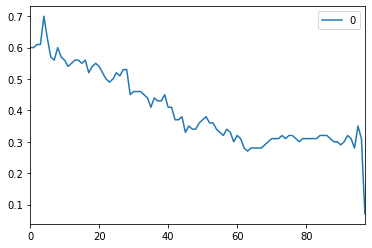

In [101]:
pd.DataFrame(accuracies).plot()

In [102]:
best_accuracy = 0
best_kernel = ''
best_dist_type = ''
for kernel in ['logistic', 'sigmoid', 'gaussian', 'uniform', 'triangular', 'epanechnikov', 'quartic', 'triweight', 'tricube', 'cosine']:
    for dist_type in ['manhattan', 'euclidean', 'chebyshev']:
        accuracies = []
        for h in np.arange(0.1, max(max_dists), 0.1):
            knn_classifier = KNN(dist_type=dist_type, kernel=kernel, h=h, window='fixed')
            accuracy = LOO(knn_classifier, X, y)
            accuracies.append(accuracy)
        if max(accuracies) > best_accuracy:
            best_kernel = kernel
            best_dist_type = dist_type
            best_accuracy = max(accuracies)

In [103]:
best_accuracy

0.69

In [104]:
best_dist_type

'manhattan'

In [105]:
best_kernel

'epanechnikov'

In [106]:
accuracies = []
for h in np.arange(0.1, max(max_dists), 0.1):
    knn_classifier = KNN(dist_type=best_dist_type, kernel=best_kernel, window='fixed', h=h)
    accuracy = LOO(knn_classifier, X, y)
    accuracies.append(accuracy)

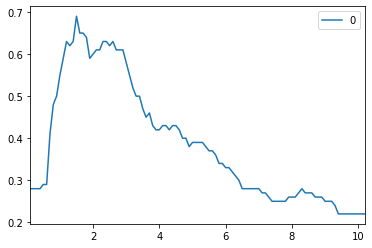

In [107]:
pd.DataFrame(accuracies, np.arange(0.1, max(max_dists), 0.1)).plot()